# Project - Regression Modeling with the Ames Housing Dataset

## Introduction

In this lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the "Ames Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Perform a linear regression using statsmodels
* Determine if a particular set of data exhibits the assumptions of linear regression
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters
* Use the coefficient of determination to determine model performance
* Interpret the parameters of a simple linear regression model in relation to what they signify for specific data


## Let's get started

### Import necessary libraries and load 'ames.csv' as a pandas dataframe

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')
ames = pd.read_csv('ames.csv')

subset = ['YrSold', 'MoSold', 'Fireplaces', 'TotRmsAbvGrd', 'GrLivArea',
          'FullBath', 'YearRemodAdd', 'YearBuilt', 'OverallCond', 'OverallQual', 'LotArea', 'SalePrice']

data = ames.loc[:, subset]

The columns in the Ames housing data represent the dependent and independent variables. We have taken a subset of all columns available to focus on feature interpretation rather than preprocessing steps. The dependent variable here is the sale price of a house `SalePrice`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). 

### Inspect the columns of the dataset and comment on type of variables present

In [35]:
print(data.shape)
print(data.info())

(1460, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
YrSold          1460 non-null int64
MoSold          1460 non-null int64
Fireplaces      1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
GrLivArea       1460 non-null int64
FullBath        1460 non-null int64
YearRemodAdd    1460 non-null int64
YearBuilt       1460 non-null int64
OverallCond     1460 non-null int64
OverallQual     1460 non-null int64
LotArea         1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(12)
memory usage: 137.0 KB
None


In [36]:
data.isnull().sum()

YrSold          0
MoSold          0
Fireplaces      0
TotRmsAbvGrd    0
GrLivArea       0
FullBath        0
YearRemodAdd    0
YearBuilt       0
OverallCond     0
OverallQual     0
LotArea         0
SalePrice       0
dtype: int64

In [37]:
data.head()

,YrSold,MoSold,Fireplaces,TotRmsAbvGrd,GrLivArea,FullBath,YearRemodAdd,YearBuilt,OverallCond,OverallQual,LotArea,SalePrice
0,2008,2,0,8,1710,2,2003,2003,5,7,8450,208500
1,2007,5,1,6,1262,2,1976,1976,8,6,9600,181500
2,2008,9,1,6,1786,2,2002,2001,5,7,11250,223500
3,2006,2,1,7,1717,1,1970,1915,5,7,9550,140000
4,2008,12,1,9,2198,2,2000,2000,5,8,14260,250000


In [38]:
data.describe()

,YrSold,MoSold,Fireplaces,TotRmsAbvGrd,GrLivArea,FullBath,YearRemodAdd,YearBuilt,OverallCond,OverallQual,LotArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2007.815753,6.321918,0.613014,6.517808,1515.463699,1.565068,1984.865753,1971.267808,5.575342,6.099315,10516.828082,180921.195890
std,1.328095,2.703626,0.644666,1.625393,525.480383,0.550916,20.645407,30.202904,1.112799,1.382997,9981.264932,79442.502883
min,2006.000000,1.000000,0.000000,2.000000,334.000000,0.000000,1950.000000,1872.000000,1.000000,1.000000,1300.000000,34900.000000
25%,2007.000000,5.000000,0.000000,5.000000,1129.500000,1.000000,1967.000000,1954.000000,5.000000,5.000000,7553.500000,129975.000000
50%,2008.000000,6.000000,1.000000,6.000000,1464.000000,2.000000,1994.000000,1973.000000,5.000000,6.000000,9478.500000,163000.000000
75%,2009.000000,8.000000,1.000000,7.000000,1776.750000,2.000000,2004.000000,2000.000000,6.000000,7.000000,11601.500000,214000.000000
max,2010.000000,12.000000,3.000000,14.000000,5642.000000,3.000000,2010.000000,2010.000000,9.000000,10.000000,215245.000000,755000.000000


In [39]:
data.corr(method='pearson')

,YrSold,MoSold,Fireplaces,TotRmsAbvGrd,GrLivArea,FullBath,YearRemodAdd,YearBuilt,OverallCond,OverallQual,LotArea,SalePrice
YrSold,1.000000,-0.145721,-0.024096,-0.034516,-0.036526,-0.019669,0.035743,-0.013618,0.043950,-0.027347,-0.014261,-0.028923
MoSold,-0.145721,1.000000,0.046357,0.036907,0.050240,0.055872,0.021490,0.012398,-0.003511,0.070815,0.001205,0.046432
Fireplaces,-0.024096,0.046357,1.000000,0.326114,0.461679,0.243671,0.112581,0.147716,-0.023820,0.396765,0.271364,0.466929
TotRmsAbvGrd,-0.034516,0.036907,0.326114,1.000000,0.825489,0.554784,0.191740,0.095589,-0.057583,0.427452,0.190015,0.533723
GrLivArea,-0.036526,0.050240,0.461679,0.825489,1.000000,0.630012,0.287389,0.199010,-0.079686,0.593007,0.263116,0.708624
FullBath,-0.019669,0.055872,0.243671,0.554784,0.630012,1.000000,0.439046,0.468271,-0.194149,0.550600,0.126031,0.560664
YearRemodAdd,0.035743,0.021490,0.112581,0.191740,0.287389,0.439046,1.000000,0.592855,0.073741,0.550684,0.013788,0.507101
YearBuilt,-0.013618,0.012398,0.147716,0.095589,0.199010,0.468271,0.592855,1.000000,-0.375983,0.572323,0.014228,0.522897
OverallCond,0.043950,-0.003511,-0.023820,-0.057583,-0.079686,-0.194149,0.073741,-0.375983,1.000000,-0.091932,-0.005636,-0.077856
OverallQual,-0.027347,0.070815,0.396765,0.427452,0.593007,0.550600,0.550684,0.572323,-0.091932,1.000000,0.105806,0.790982


In [ ]:
# Observations on the data: 
# The df contains 1,460 rows of data for 12 columns
# Data is for homes sold over a 5-year period (2006 to 2010); median sale price of $163,000
# Data is all in integer format and there appear to be no missing values
# Some of the columns are a limited number of counts (like # fireplaces or #bathrooms)
# Some date columns are transformed into numbers (years and months)
# Looking at mins and maxs, some columns appear to have outliers (YearBuilt; LotArea)
# Also looked at correlations (with SalePrice) and see 2 variables with strong correlations (GrLivArea, OverallQual)


### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

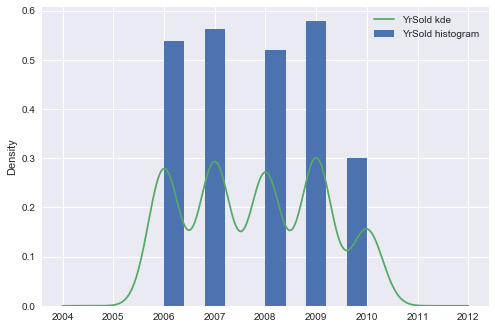

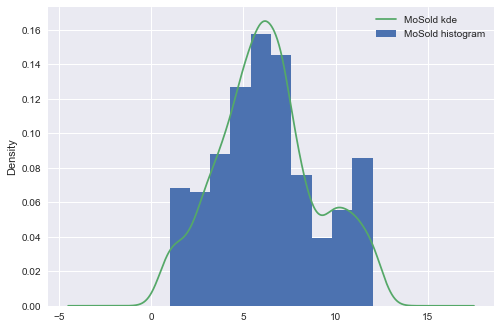

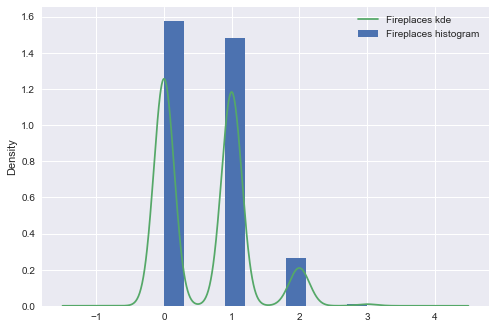

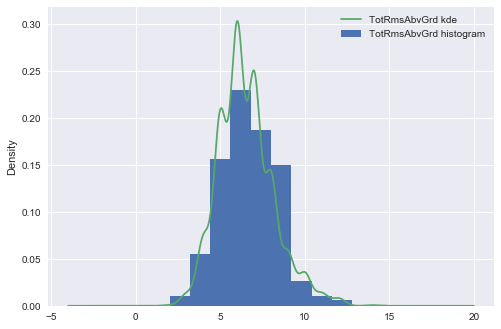

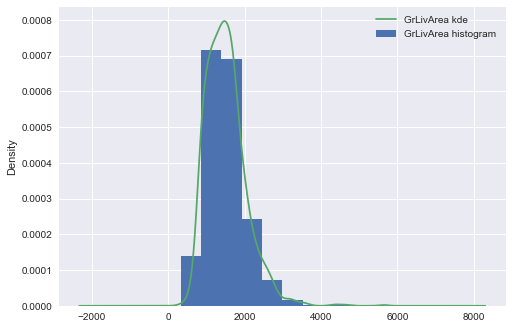

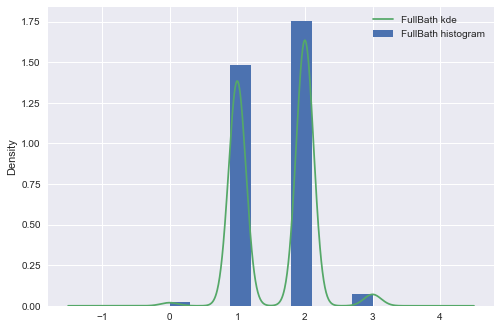

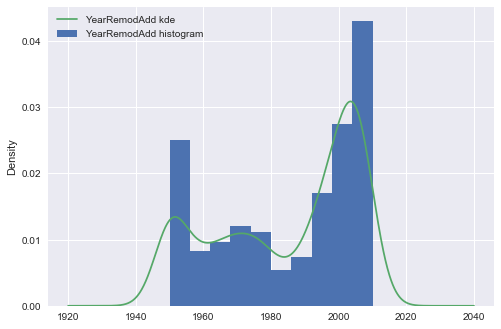

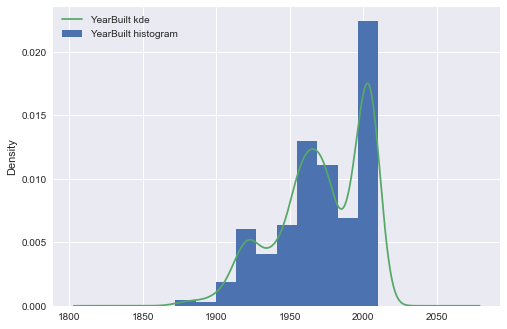

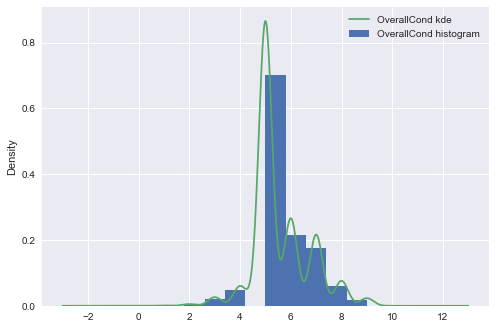

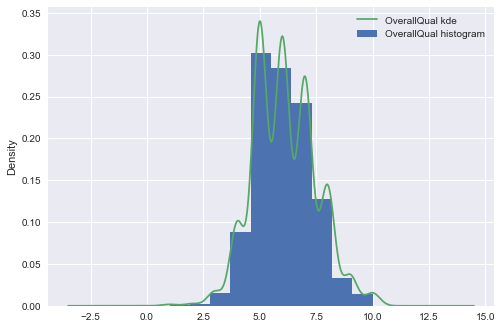

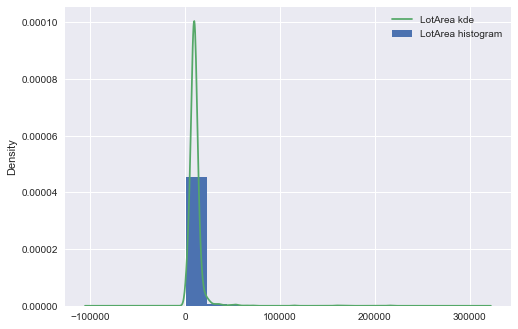

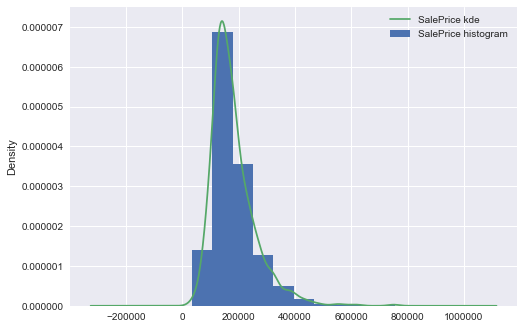

In [40]:
# This is for all 12 variables
for column in data:
    data[column].plot.hist(density=True, label = column+' histogram')
    data[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

(0, 50000)

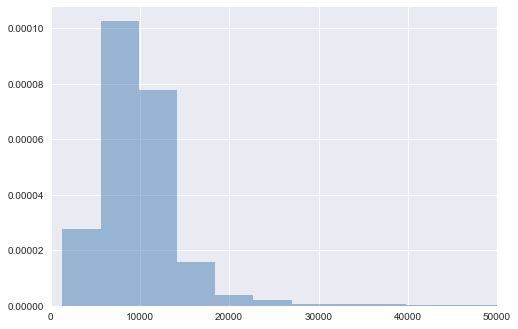

In [41]:
# Try adjusting the scale to get a better look at LotArea
# data['LotArea'].plot.hist()
plt.hist(data['LotArea'], bins=50, density=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')
plt.xlim(0, 50000)

In [ ]:
# Observations on the distributions:
# Most appear to be at least somewhat normally distributed. Some with bi-modal charachteristics(OverallCond, MonthSold)
# Some appear to have outliers that show up here... OverallCond, YearBuilt, SalePrice
# Note that YearRemodAdd may be inaccurate as if no remodel just the year built is used as the value... so not all have a remodel

### Check the linearity assumption for all chosen features with target variable using scatter plots

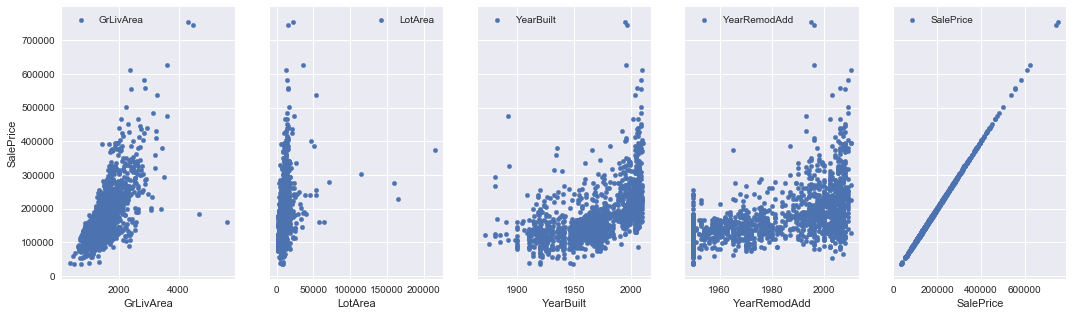

In [48]:
# Creating scatter plots to look at linearity (grouped by numerical and categorical)
# visualize the relationship between the preditors and the target using scatterplots
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(18, 5))
for idx, channel in enumerate(['GrLivArea', 'LotArea', 'YearBuilt', 'YearRemodAdd','SalePrice']):
    data.plot(kind='scatter', x=channel, y='SalePrice', ax=axs[idx], label=channel)
plt.legend()
plt.show()

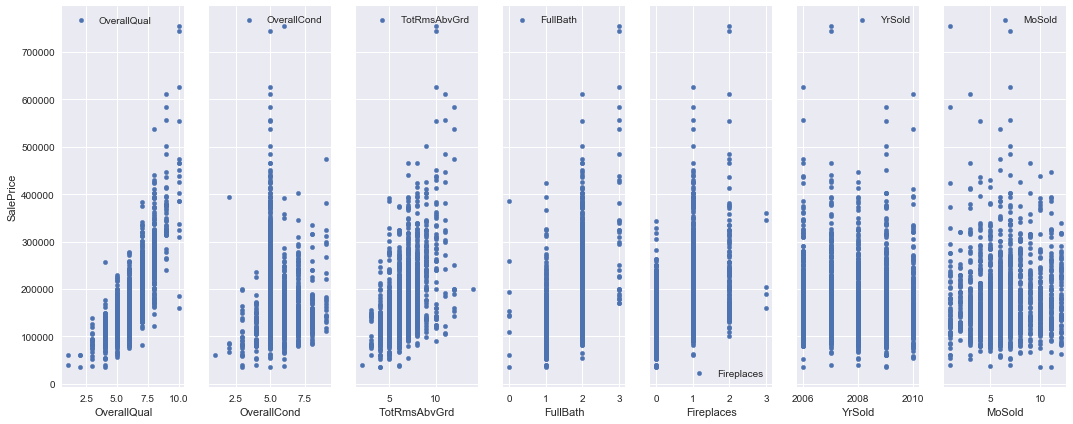

In [49]:
# Creating scatter plots to look at linearity - rest of them (categorical)
# visualize the relationship between the preditors and the target using scatterplots
fig, axs = plt.subplots(1, 7, sharey=True, figsize=(18, 7))
for idx, channel in enumerate(['OverallQual','OverallCond','TotRmsAbvGrd','FullBath', 'Fireplaces', 'YrSold', 'MoSold']):
    data.plot(kind='scatter', x=channel, y='SalePrice', ax=axs[idx], label=channel)
plt.legend()
plt.show()

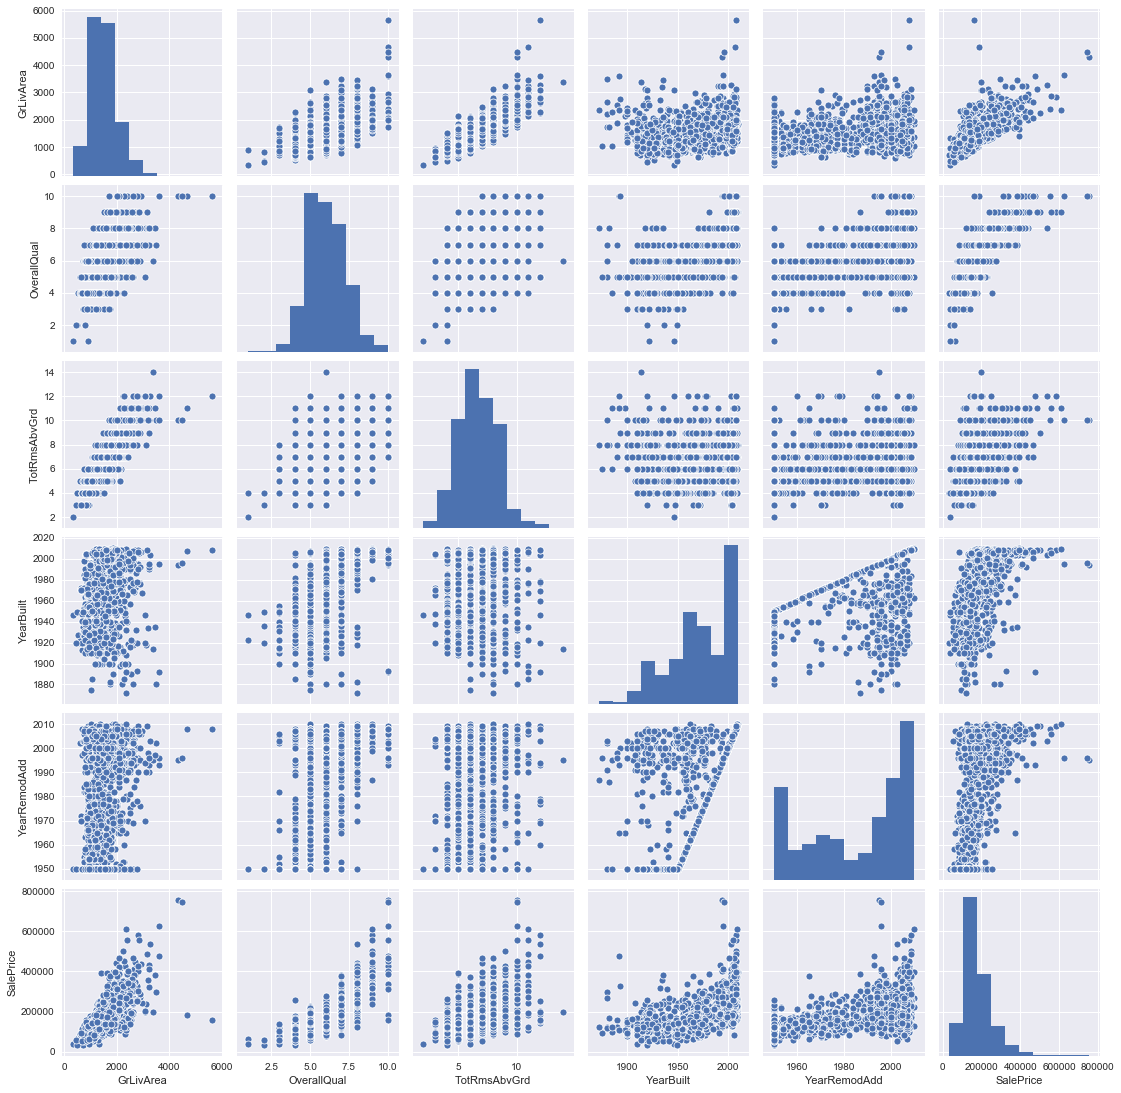

In [50]:
# Try the multiple plots at once thing... 
# pd.plotting.scatter_matrix(data)
import seaborn as sns
sns.pairplot(data[['GrLivArea', 'OverallQual', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'SalePrice']])


In [ ]:
# Observations on the scatterplots: 
# Notice lots of outliers for the various variables
# Some degree of linearity for most; strongest seem to be GrLivArea, OverallQual, YearBuilt

Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll use the dataset untouched and just move on with the regression. The assumptions are not _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

In [ ]:
# Split out y from the df

y = data[['SalePrice']]
X = data.drop(['SalePrice'], axis=1)

In [51]:
# Do the train test split before running any tests
from sklearn.model_selection import train_test_split

In [52]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
# Alternative method
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(len(X_train), len(X_test), len(y_train), len(y_test))

In [55]:
train

,YrSold,MoSold,Fireplaces,TotRmsAbvGrd,GrLivArea,FullBath,YearRemodAdd,YearBuilt,OverallCond,OverallQual,LotArea,SalePrice
254,2010,6,0,5,1314,1,1957,1957,6,5,8400,145000
1066,2009,5,1,7,1571,2,1994,1993,7,6,7837,178000
638,2008,5,0,4,796,1,1950,1910,7,5,8777,85000
799,2007,6,2,7,1768,1,1950,1937,7,5,7200,175000
380,2010,5,1,6,1691,2,1950,1924,6,5,5000,127000
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2007,3,1,6,1314,2,2006,2006,5,6,9317,176432
1130,2009,12,2,7,1981,2,1950,1928,3,4,7804,135000
1294,2006,4,0,5,864,1,1990,1955,7,5,8172,115000
860,2007,6,1,7,1426,1,1998,1918,8,7,7642,189950


In [56]:
test

,YrSold,MoSold,Fireplaces,TotRmsAbvGrd,GrLivArea,FullBath,YearRemodAdd,YearBuilt,OverallCond,OverallQual,LotArea,SalePrice
892,2006,2,0,6,1068,1,2003,1963,8,6,8414,154500
1105,2010,4,2,9,2622,2,1995,1994,5,8,12256,325000
413,2010,3,1,5,1028,1,1950,1927,6,5,8960,115000
522,2006,10,2,7,1664,2,1950,1947,7,6,5000,159000
1036,2009,9,1,6,1620,2,2008,2007,5,9,12898,315500
...,...,...,...,...,...,...,...,...,...,...,...,...
479,2007,3,0,7,1131,1,2000,1937,7,4,5925,89471
1361,2009,6,1,7,1530,2,2005,2005,5,7,16158,260000
802,2008,10,1,7,1456,2,2005,2005,5,7,8199,189000
651,2009,10,1,7,1510,1,1950,1940,5,4,9084,108000


In [ ]:
# RUN Regression Model: will start with 2 variables with the highest correlation with SalePrice
# (GrLivArea, then OverallQual ... aka running them seperately)

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [57]:
# Start with test of one variable (GrLivArea)
f = 'SalePrice~GrLivArea'
# create a fitted model in one line
model = ols(formula=f, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     1093.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):          1.08e-169
Time:                        15:11:22   Log-Likelihood:                -14416.
No. Observations:                1168   AIC:                         2.884e+04
Df Residuals:                    1166   BIC:                         2.885e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.49e+04   5005.211      4.975      0.000    1.51e+04    3.47e+04
GrLivArea    102.4890      3.099     33.066      0.000      96.408     108.570
==============================================================================
Omnibus:                      189.026   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2473.723
Skew:                           0.274   Prob(JB):                         0.00
Kurtosis:                      10.108   Cond. No.                     4.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


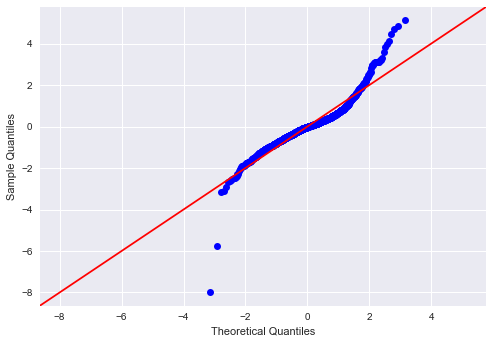

In [58]:
# QQ-Plot
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

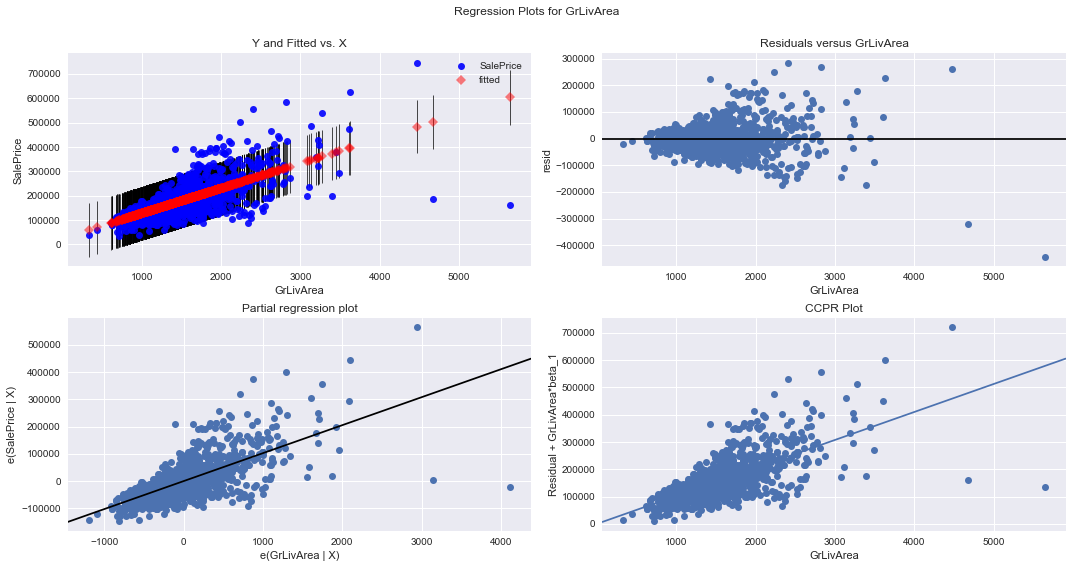

In [59]:
# residuals plot
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "GrLivArea", fig=fig)
plt.show()

In [ ]:
# SUMMARY of Regression 1: 
# R-squared is not very high (.484), but we can reject the null
# coefficient is significant (pvalue is less than sig level)
# BUT the qq-plot not look great so not very normally distributed
# AND errot plot shows some heterostacticity and we see a large value for Kutosis
# JB test has a high value... this indicates that not normal dist?

In [ ]:
# Take 2 with another variable: OverallQual

In [60]:
f = 'SalePrice~OverallQual'
# create a fitted model in one line
model = ols(formula=f, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1879.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):          2.60e-245
Time:                        15:13:06   Log-Likelihood:                -14242.
No. Observations:                1168   AIC:                         2.849e+04
Df Residuals:                    1166   BIC:                         2.850e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.023e+04   6421.492    -14.052      0.000   -1.03e+05   -7.76e+04
OverallQual  4.438e+04   1023.777     43.349      0.000    4.24e+04    4.64e+04
==============================================================================
Omnibus:                      396.196   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3000.603
Skew:                           1.358   Prob(JB):                         0.00
Kurtosis:                      10.368   Cond. No.                         29.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


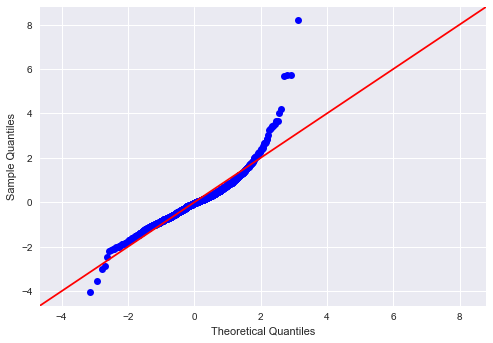

In [61]:
# QQ-Plot
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

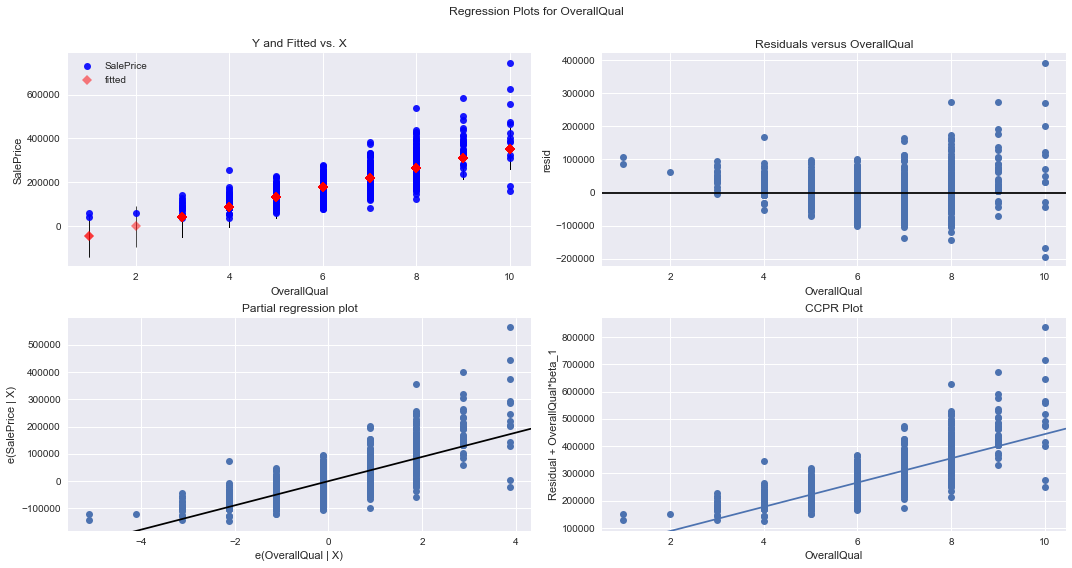

In [62]:
# residuals plot
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "OverallQual", fig=fig)
plt.show()

In [ ]:
# SUMMARY of Regression 2: 
# R-squared is higher for this variable (.617), and we can reject the null
# coefficient is significant (pvalue is less than sig level)
# BUT the qq-plot not look great (veres off at the top) so not very normally distributed
# AND errot plot shows some heterostacticity and we see a large value for Kutosis
# JB test has a high value... this indicates that not normal dist?
# Also note that this is a categorical variable so may need to be transformed. 

In [65]:
# Split data into x and y versions of train and test
y_test = test[['SalePrice']]
X_test = test.drop(['SalePrice'],axis=1)
y_train = train[['SalePrice']]
X_train = train.drop(['SalePrice'],axis=1)


In [66]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

1168 292 1168 292


In [67]:
# Try and baseline this to the test data set (before changes)
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


In [68]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Root Mean Squarred Error:', train_mse**0.5)
print('Test Root Mean Squarred Error:', test_mse**0.5)

Train Root Mean Squarred Error: 38131.304429780976
Test Root Mean Squarred Error: 41625.714778093134


In [ ]:
# Observations on Baseline validation:
# The test RMSE is only about 3K more than the train RMSE so fairly close.
# I am assuming this means that this is saying that 41.6K is the error in our model - for Y: the SalePrice of a home in our dataset.

In [74]:
train.shape

(1168, 12)

In [77]:
# Do some variable manipulation to train data (remove outliers for the 2 models already run)
# For GrLivArea will limit to 1,000 (just below 25 percentile) to 2,000 (just a bit over the 75 percentile)
# Can I go back to the original data set of train and test and just apply there?
train3 = train[train['GrLivArea'] >= 1000]


In [82]:
train3.shape

(996, 12)

In [89]:
train3.head()

,YrSold,MoSold,Fireplaces,TotRmsAbvGrd,GrLivArea,FullBath,YearRemodAdd,YearBuilt,OverallCond,OverallQual,LotArea,SalePrice
254,2010,6,0,5,1314,1,1957,1957,6,5,8400,145000
1066,2009,5,1,7,1571,2,1994,1993,7,6,7837,178000
799,2007,6,2,7,1768,1,1950,1937,7,5,7200,175000
380,2010,5,1,6,1691,2,1950,1924,6,5,5000,127000
86,2009,3,1,6,1560,2,2005,2005,5,6,11911,174000


In [83]:
train4 = train3[train3['GrLivArea'] <= 2000]

In [86]:
train4.shape

(822, 12)

In [87]:
# Running model with variable (GrLivArea) with outliers removed
f = 'SalePrice~GrLivArea'
# create a fitted model in one line
model = ols(formula=f, data=train4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     342.8
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           3.29e-64
Time:                        19:08:26   Log-Likelihood:                -10011.
No. Observations:                 822   AIC:                         2.003e+04
Df Residuals:                     820   BIC:                         2.004e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8187.9679   9187.609      0.891      0.373   -9846.034    2.62e+04
GrLivArea    113.6059      6.136     18.515      0.000     101.562     125.650
==============================================================================
Omnibus:                      121.461   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.809
Skew:                           0.832   Prob(JB):                     3.14e-58
Kurtosis:                       5.228   Cond. No.                     8.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


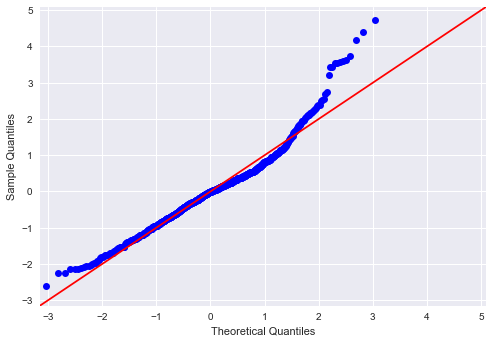

In [88]:
# QQ-Plot
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

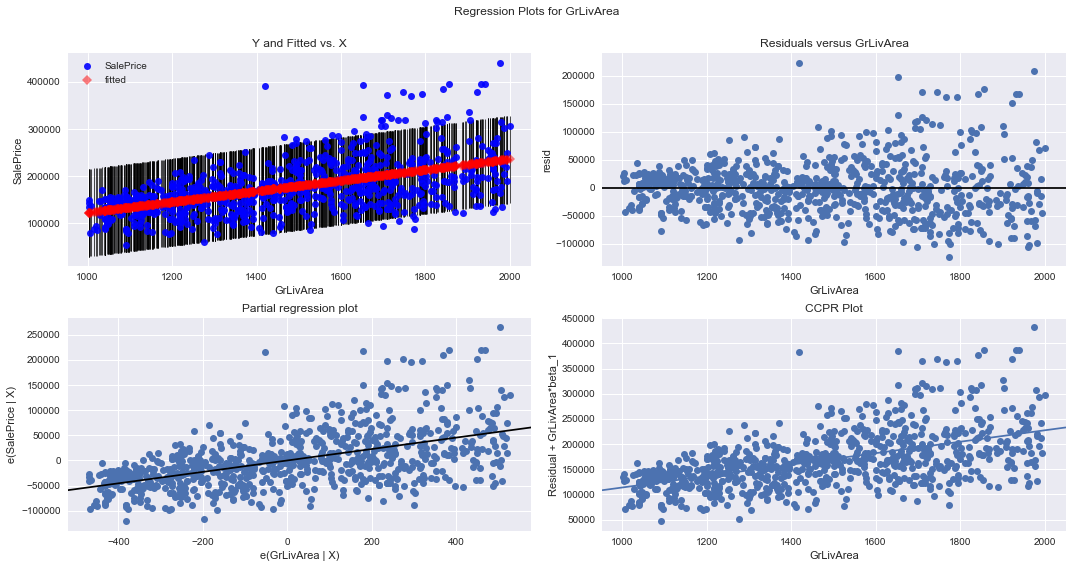

In [93]:
# residuals plot
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "GrLivArea", fig=fig)
plt.show()

In [ ]:
# Observations on the model with outliers removed
# looks like not any improvement in R2 - now .295 , before was .484 (intersting that the model got worse)
# not sure what it means that the intercept has a high p? 


In [94]:
# Do a multiple linear regresssion with 4 independent variables
f = 'SalePrice~GrLivArea+TotRmsAbvGrd+LotArea+OverallQual'
# create a fitted model in one line
model = ols(formula=f, data=train4).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     406.8
Date:                Tue, 10 Nov 2020   Prob (F-statistic):          1.04e-192
Time:                        19:58:44   Log-Likelihood:                -9704.2
No. Observations:                 822   AIC:                         1.942e+04
Df Residuals:                     817   BIC:                         1.944e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -7.545e+04   8323.603     -9.064      0.000   -9.18e+04   -5.91e+04
GrLivArea       62.5737      6.375      9.815      0.000      50.060      75.088
TotRmsAbvGrd -5504.2304   1365.824     -4.030      0.000   -8185.168   -2823.293
LotArea          1.1364      0.141      8.043      0.000       0.859       1.414
OverallQual   2.978e+04   1069.488     27.842      0.000    2.77e+04    3.19e+04
==============================================================================
Omnibus:                      108.965   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              402.302
Skew:                           0.586   Prob(JB):                     4.38e-88
Kurtosis:                       6.220   Cond. No.                     9.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


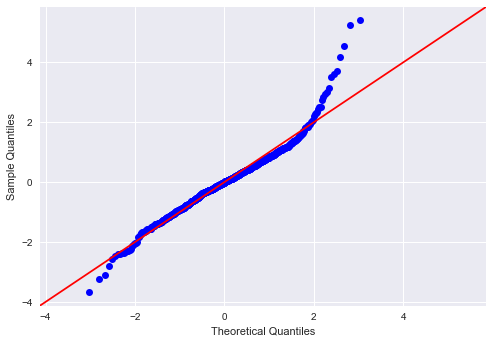

In [95]:
# QQ-Plot
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

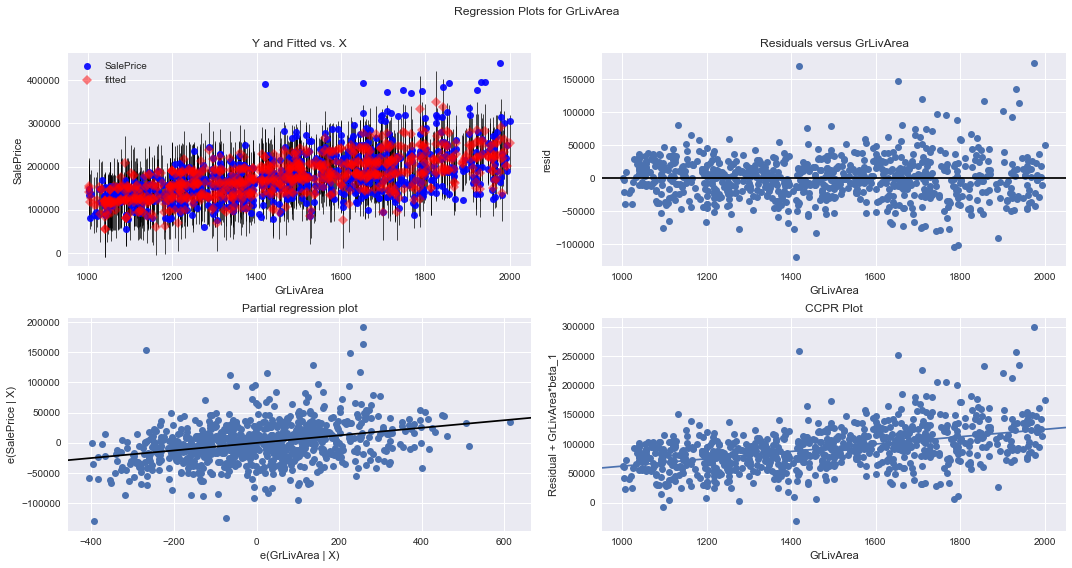

In [98]:
# residuals plot
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "GrLivArea", fig=fig)
plt.show()

In [ ]:
# OBSERVATIONS on the multiple linear regression: 
# The adj. R-squared is 0.67, and we can reject the null hypothesis for both the model and all 4 independent variables. 
# The QQ plot falls off at the top, so residuals not normally distributed
# Not sure how to do the residuals plot to take into account all residuals. It looks like I have to specify just one?
# However, the plot looks only a bit off for homoscadactity. 
# We do see a high Kurtosis value and high JB score. 

In [99]:
# Do another bit of variable manipulation to train data - deal with categorical variables by creating dummies...
# for OverallQual 

Qual_dummies = pd.get_dummies(train4['OverallQual'], prefix='Qual', drop_first=True)
train5 = train4.drop(['OverallQual'], axis=1)
train5 = pd.concat([train5, Qual_dummies], axis=1)
train5.head()

,YrSold,MoSold,Fireplaces,TotRmsAbvGrd,GrLivArea,FullBath,YearRemodAdd,YearBuilt,OverallCond,LotArea,SalePrice,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9
254,2010,6,0,5,1314,1,1957,1957,6,8400,145000,0,1,0,0,0,0
1066,2009,5,1,7,1571,2,1994,1993,7,7837,178000,0,0,1,0,0,0
799,2007,6,2,7,1768,1,1950,1937,7,7200,175000,0,1,0,0,0,0
380,2010,5,1,6,1691,2,1950,1924,6,5000,127000,0,1,0,0,0,0
86,2009,3,1,6,1560,2,2005,2005,5,11911,174000,0,0,1,0,0,0


In [106]:
train4['OverallQual'].value_counts()

6    243
5    207
7    205
8     90
4     47
9     20
3     10
Name: OverallQual, dtype: int64

In [107]:
# Do a multiple linear regresssion with the 6 dummies from OverallQual
f = 'SalePrice~Qual_4+Qual_5+Qual_6+Qual_7+Qual_8+Qual_9'
# create a fitted model in one line
model = ols(formula=f, data=train5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     235.4
Date:                Wed, 11 Nov 2020   Prob (F-statistic):          3.87e-174
Time:                        11:50:56   Log-Likelihood:                -9741.4
No. Observations:                 822   AIC:                         1.950e+04
Df Residuals:                     815   BIC:                         1.953e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.035e+05   1.08e+04      9.608      0.000    8.24e+04    1.25e+05
Qual_4      1.612e+04   1.19e+04      1.358      0.175   -7172.391    3.94e+04
Qual_5       3.49e+04    1.1e+04      3.164      0.002    1.33e+04    5.66e+04
Qual_6      5.947e+04    1.1e+04      5.410      0.000    3.79e+04     8.1e+04
Qual_7      9.101e+04    1.1e+04      8.249      0.000    6.94e+04    1.13e+05
Qual_8      1.508e+05   1.14e+04     13.275      0.000    1.28e+05    1.73e+05
Qual_9      2.278e+05   1.32e+04     17.266      0.000    2.02e+05    2.54e+05
==============================================================================
Omnibus:                       89.589   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.310
Skew:                           0.536   Prob(JB):                     2.45e-58
Kurtosis:                       5.568   Cond. No.                         26.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


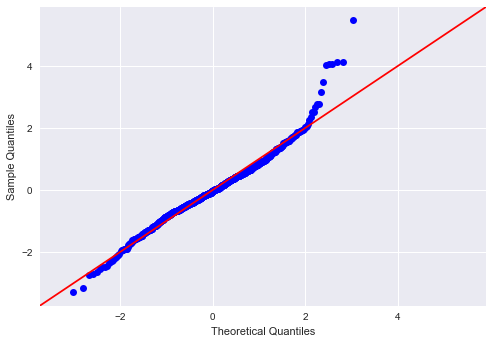

In [108]:
# QQ-Plot
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

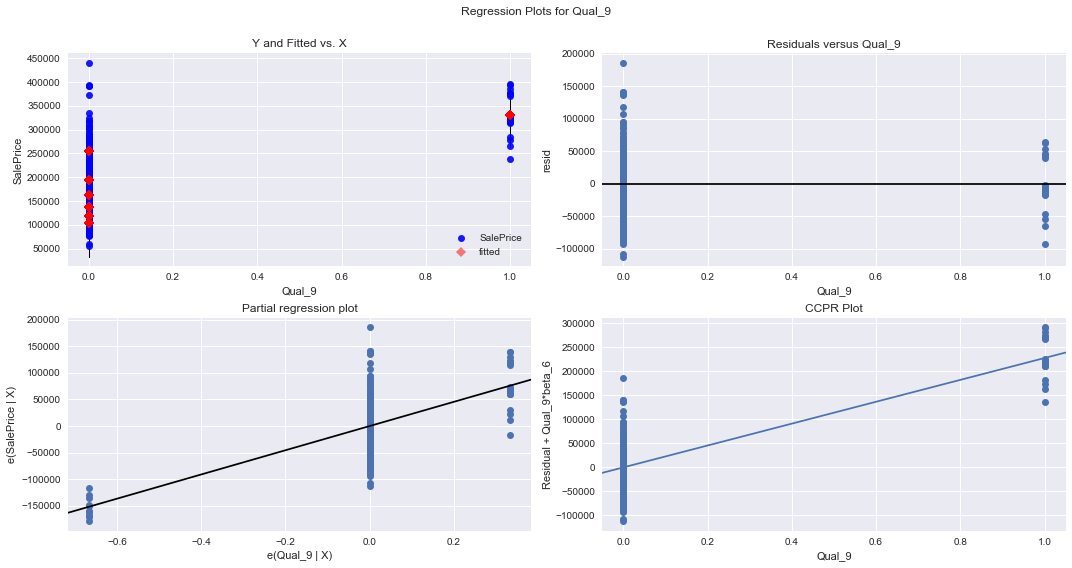

In [116]:
# residuals plot
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Qual_9", fig=fig)
plt.show()

In [ ]:
# OBSERVATIONS on multiple linear regression 2: 
# Reasonable R-squared of 0.634 (original for OverallQual was .62)
# All but Qual_4 are able to reject null for coefficients
# QQ plot looks reasonable; not sure how to deal with residuals for this categorical value?
# Some level of Kurtosis present 

In [ ]:
# FINAL NOTES AND OBSERVATIONS: 
# A few things I may still try and play aroud with. Taking a look at a heatmap to detect multicolinearity between indp. variables;
# getting rid of more outliers - for a few variables I tried in the model (maybe trying the 3 SD cutt-off method); 
# and then trying one more model or two and then do the validation step again. 

Clearly, the results are not very reliable. The best R-Squared is witnessed with `OverallQual`, so in this analysis, this is our best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where the preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Ames dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in the results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.